# Fundamentals

이 챕터에서는 본 발표를 이해하기 위해 필요한 배경과 각종 용어에 대해 설명합니다.

## 1. Why Large Scale?

최근 인류 역사상 최고의 언어모델이라는 평가를 받고 있는 GPT3를 필두로 딥러닝 언어모델의 크기가 점점 커지고 있는 추세입니다. 몇 년전까지만 해도 큰 모델이라고 평가받던 BERT가 이제는 아기자기한 사이즈의 모델이 되었죠. 그런데 한가지 궁금증이 생깁니다. 최근부터 왜 갑자기 모델의 크기가 점점 커지고 있는걸까요? 


![](../images/why_large_scale.png)

<br>

### 1) 모델의 아키텍처가 그다지 중요하지 않다?
지금까지 많은 연구자들이 모델의 아키텍처에 매우 큰 관심을 기울여왔지만 최근 연구 결과에 따르면 그동안의 변화가 생각보다 큰 차이를 가져오지는 못하는 것으로 밝혀졌습니다. 물론 아키텍처의 개선에 의해 언어모델의 성능이 어느정도 향상된 것은 사실이지만 판을 깨는 수준으로 드라마틱한 성능 개선을 가져오지는 못했죠. 

![](../images/arch_is_not_important.png)

<br>

### 2) 결국 관건은 데이터와 모델의 크기, 그들이 곧 성능과 비례한다.
이전에도 데이터와 모델의 크기가 커지면 성능이 개선되는 것은 알고 있었습니다. 그러나 이것을 극단적으로 키워보니 모델이 마법같은 일을 하기 시작했습니다. 예를 들면 언어모델이 fine-tuning 없이 번역, 요약, 분류 등의 태스크를 수행할 수 있었습니다. 단순히 수행만 하는게 아니라 성능도 fine-tuning한 모델과 비슷한 수준을 보여줬죠. 연구자들이 이러한 현상을 분석해보니 모델의 크기가 성능에 가장 큰 영향을 미치고 그 다음으로 데이터의 크기가 중요했다고 합니다. 아래 그래프의 Y축이 log scale인 것을 감안하면 모델의 크기가 성능에 미치는 영향은 엄청난 수준이죠.

![](../images/scale_is_all_you_need.png)

<br>

### 이대로 간다면 아마 몇년 뒤...?

![](../images/GPT-X.png)

<br><br>
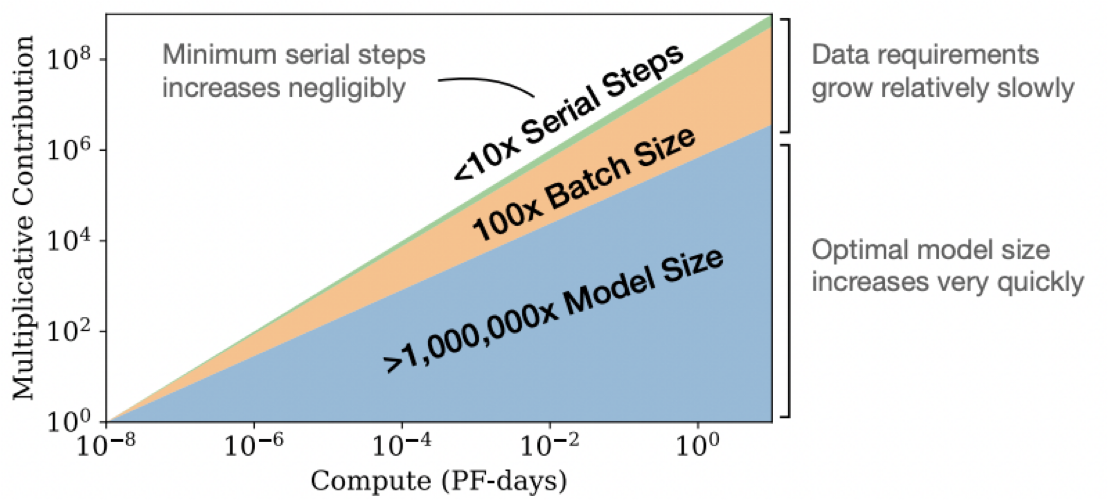
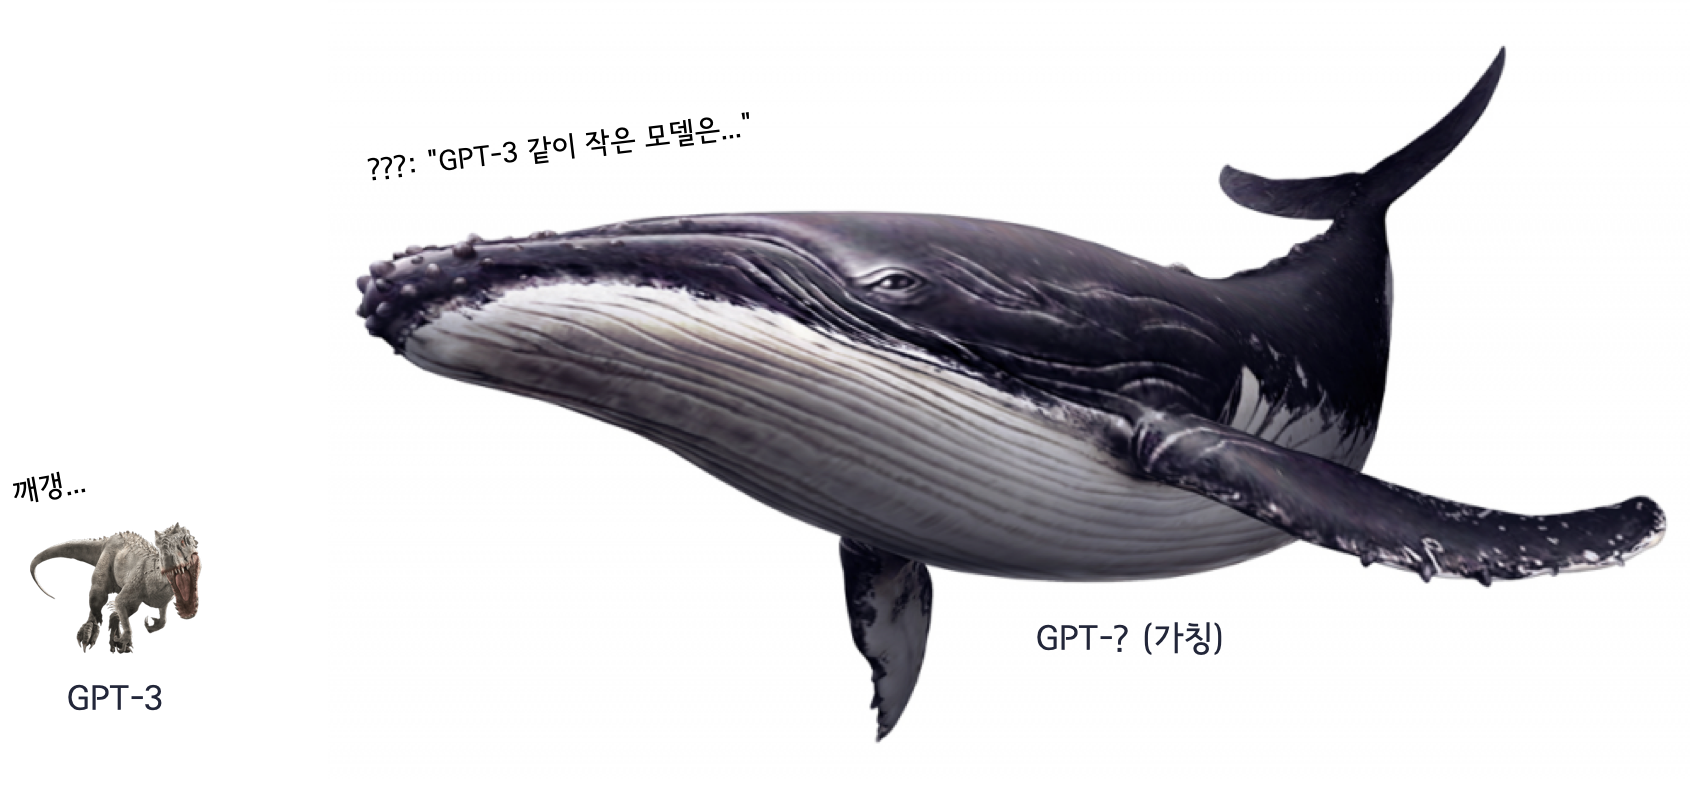
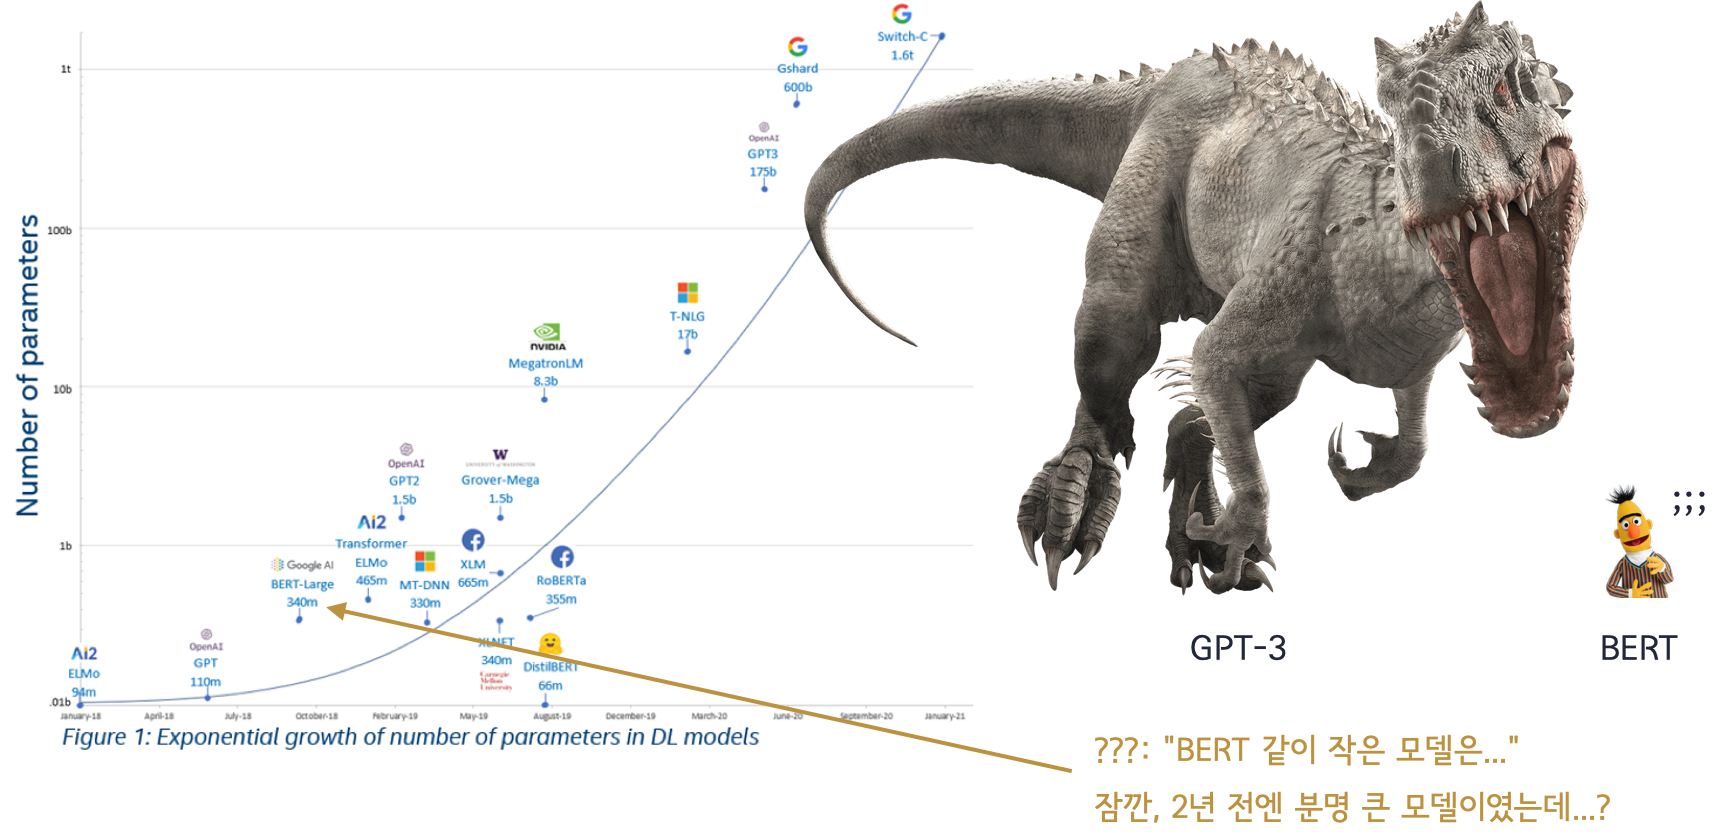
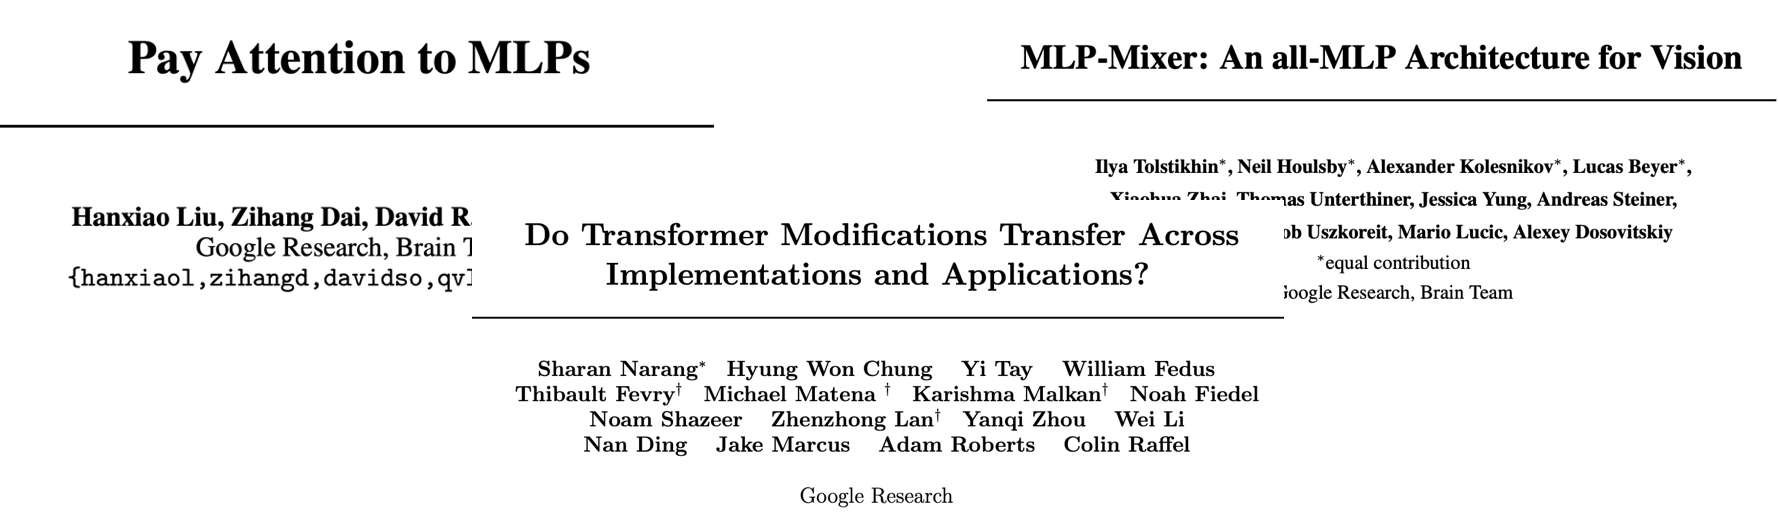

## 2. Large-scale의 시대에 우리는 무엇을 준비해야 할까?

Large-scale transformer 모델은 기존과 아키텍처는 거의 동일한데, 모델의 모델과 데이터 사이즈를 엄청나게 키운 것입니다. 그래서 몇몇 사람들은 아래처럼 생각 하기도 하죠.

![](../images/is_large_scale_easy.png)

<br>

### 하지만 현실은...

하지만 Large-scale 모델을 잘 다루려면 아래와 같이 수 많은 하드코어 엔지니어링들이 병행되어야 합니다.<br>
~(개발중에 모르는게 생겼다고요? 물어봐도 소용없어요! 어차피 아무도 모르거든요 ㅋ 알아서 해결해야 합니다.)~

![](../images/hard_core_engineering.png)

<br>

즉 이러한 엔지니어링 테크닉을 사용할 줄 알아야 Large-scale 시대의 모델링을 수행 할 수 있습니다.
문제는 이러한 기술들은 전문적으로 공부하지 않은 사람들이 아니면 사용하기 어렵다는 것입니다.
일반적인 모델 사이언티스트들에게는 다소 난해하기도 한 개념들도 많아요. 한국어로 만들어진 자료는 더더욱 없습니다.


### So What?
저는 이러한 이유 때문에 이 발표와 자료를 만들게 되었습니다. 이 자료가 라지스케일 엔지니어링을 처음 배우는 분들에게 어느정도 길라잡이가 되어주길 바랍니다. :)

<br><br>
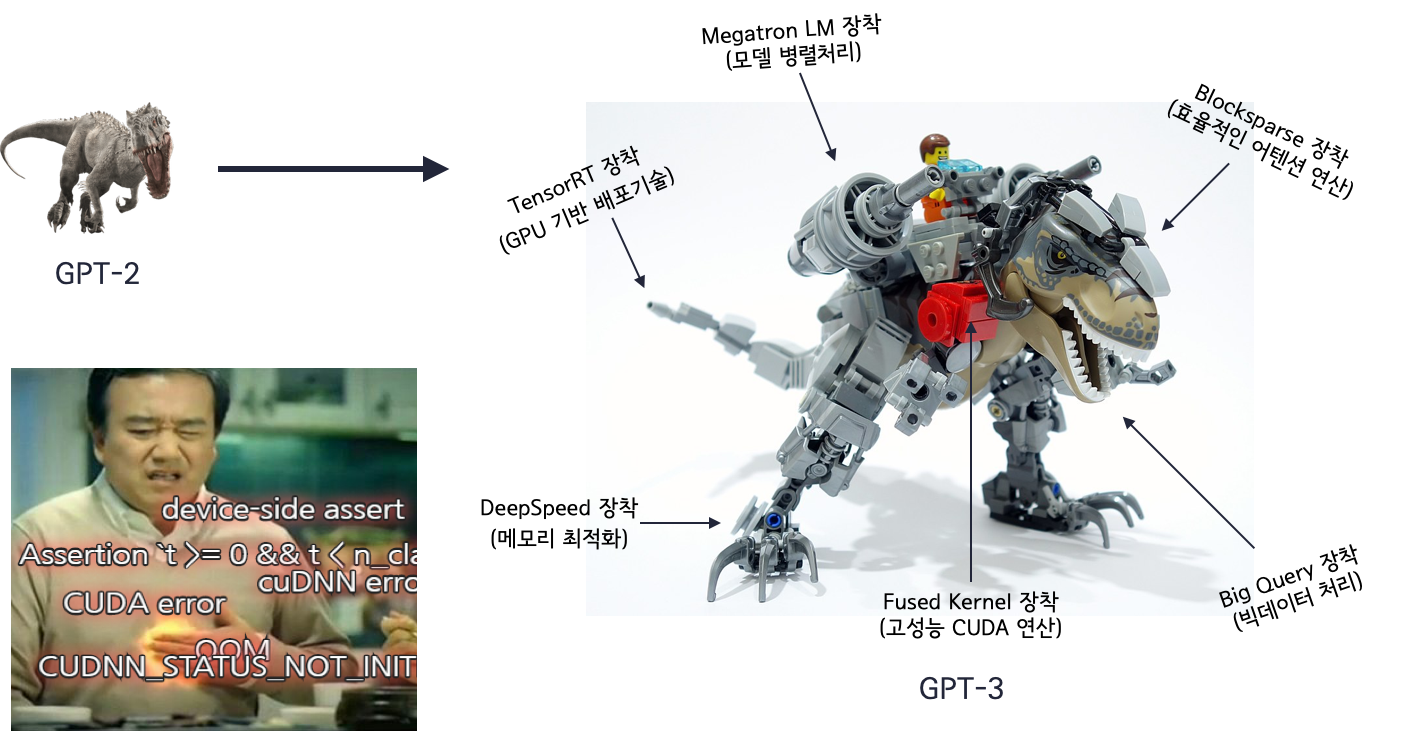
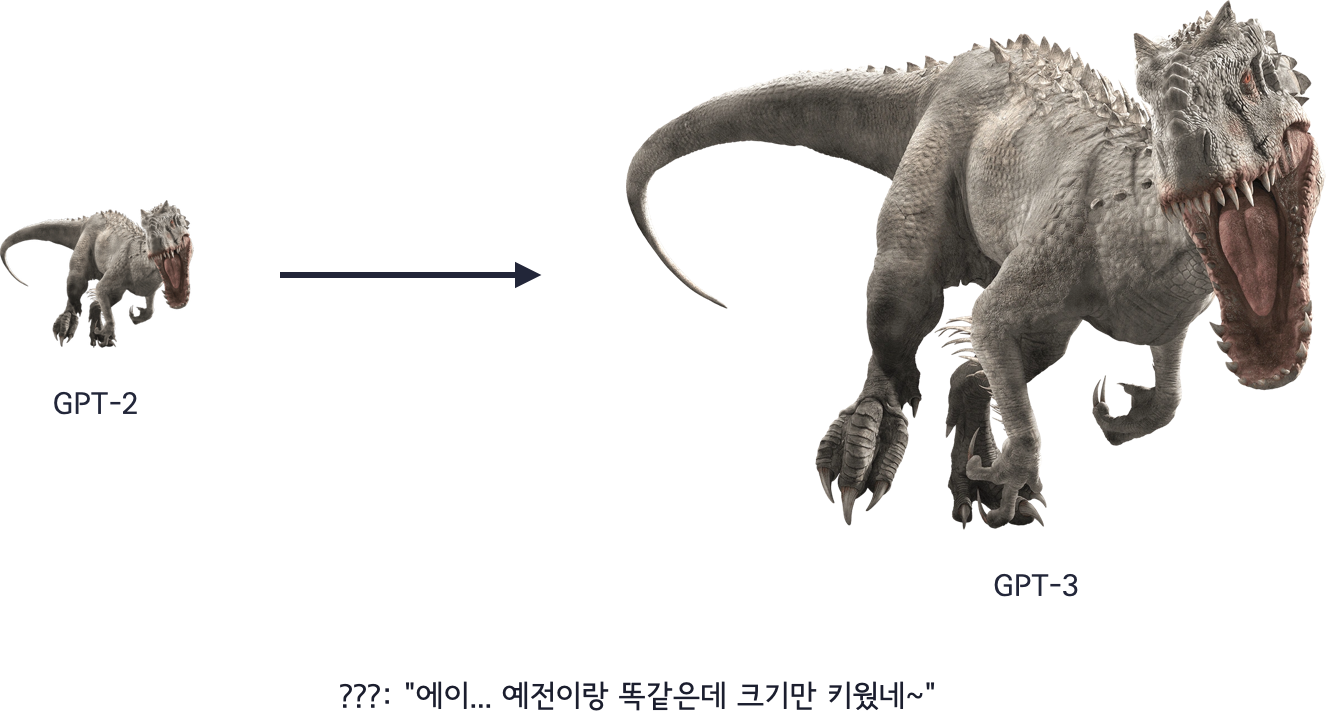

## 3. Glossary

이 챕터에서는 각종 용어에 대해 설명합니다.

### 병렬화 (Parallelism)
- 병렬화란 여러개를 동시에 처리하는 기술을 의미하며 Large-scale 모델링에서 가장 중요한 기술 중 하나입니다.
- 머신러닝에서는 주로 여러개의 디바이스에서 연산을 병렬화 하여 속도나 메모리 효율성을 개선하기 위해 사용합니다.
- 현대의 Large-scale 모델링에는 주로 3가지 병렬화를 수행합니다.

![](../images/parallelism.png)

<br>

### 데이터 병렬화 (Data Parallelism)
- 데이터 병렬화는 데이터의 수가 많을 때, 데이터를 병렬처리하여 학습속도를 빠르게 하는 방법입니다.
- 모든 디바이스에 모델을 복제하고, 서로 다른 데이터를 각 디바이스에 입력하는 방식으로 동작합니다.
- 이로 인해 배치사이즈를 디바이스의 수의 배수만큼 더 많이 입력할 수 있습니다.
- 그러나 이러한 데이터 병렬화는 모델 하나가 디바이스 하나에 완전히 올라 갈 수 있을때 가능합니다.

![](../images/data_parallelism.png)

<br>

### 모델 병렬화 (Model Parallelism)
- 만약 모델이 너무 커서 하나의 디바이스에 완전히 올라갈 수 없다면, 파라미터를 쪼개서 여러 디바이스에 올려야 합니다.
- 따라서 각 디바이스에는 파라미터의 일부분들이 담겨있습니다.
- 이로 인해 큰 모델도 작은 디바이스 여러개를 이용하면 처리가 가능해집니다.
- 모델 병렬화는 병렬화 되는 차원에 따라 인터레이어, 인트라레이어 모델 병렬화로 구분할 수 있습니다.

![](../images/model_parallelism.png)

### 인터 레이어 모델 병렬화 (Inter-layer Model Parallelism)

### 인트라 레이어 모델 병렬화 (Intra-layer Model Parallelism)
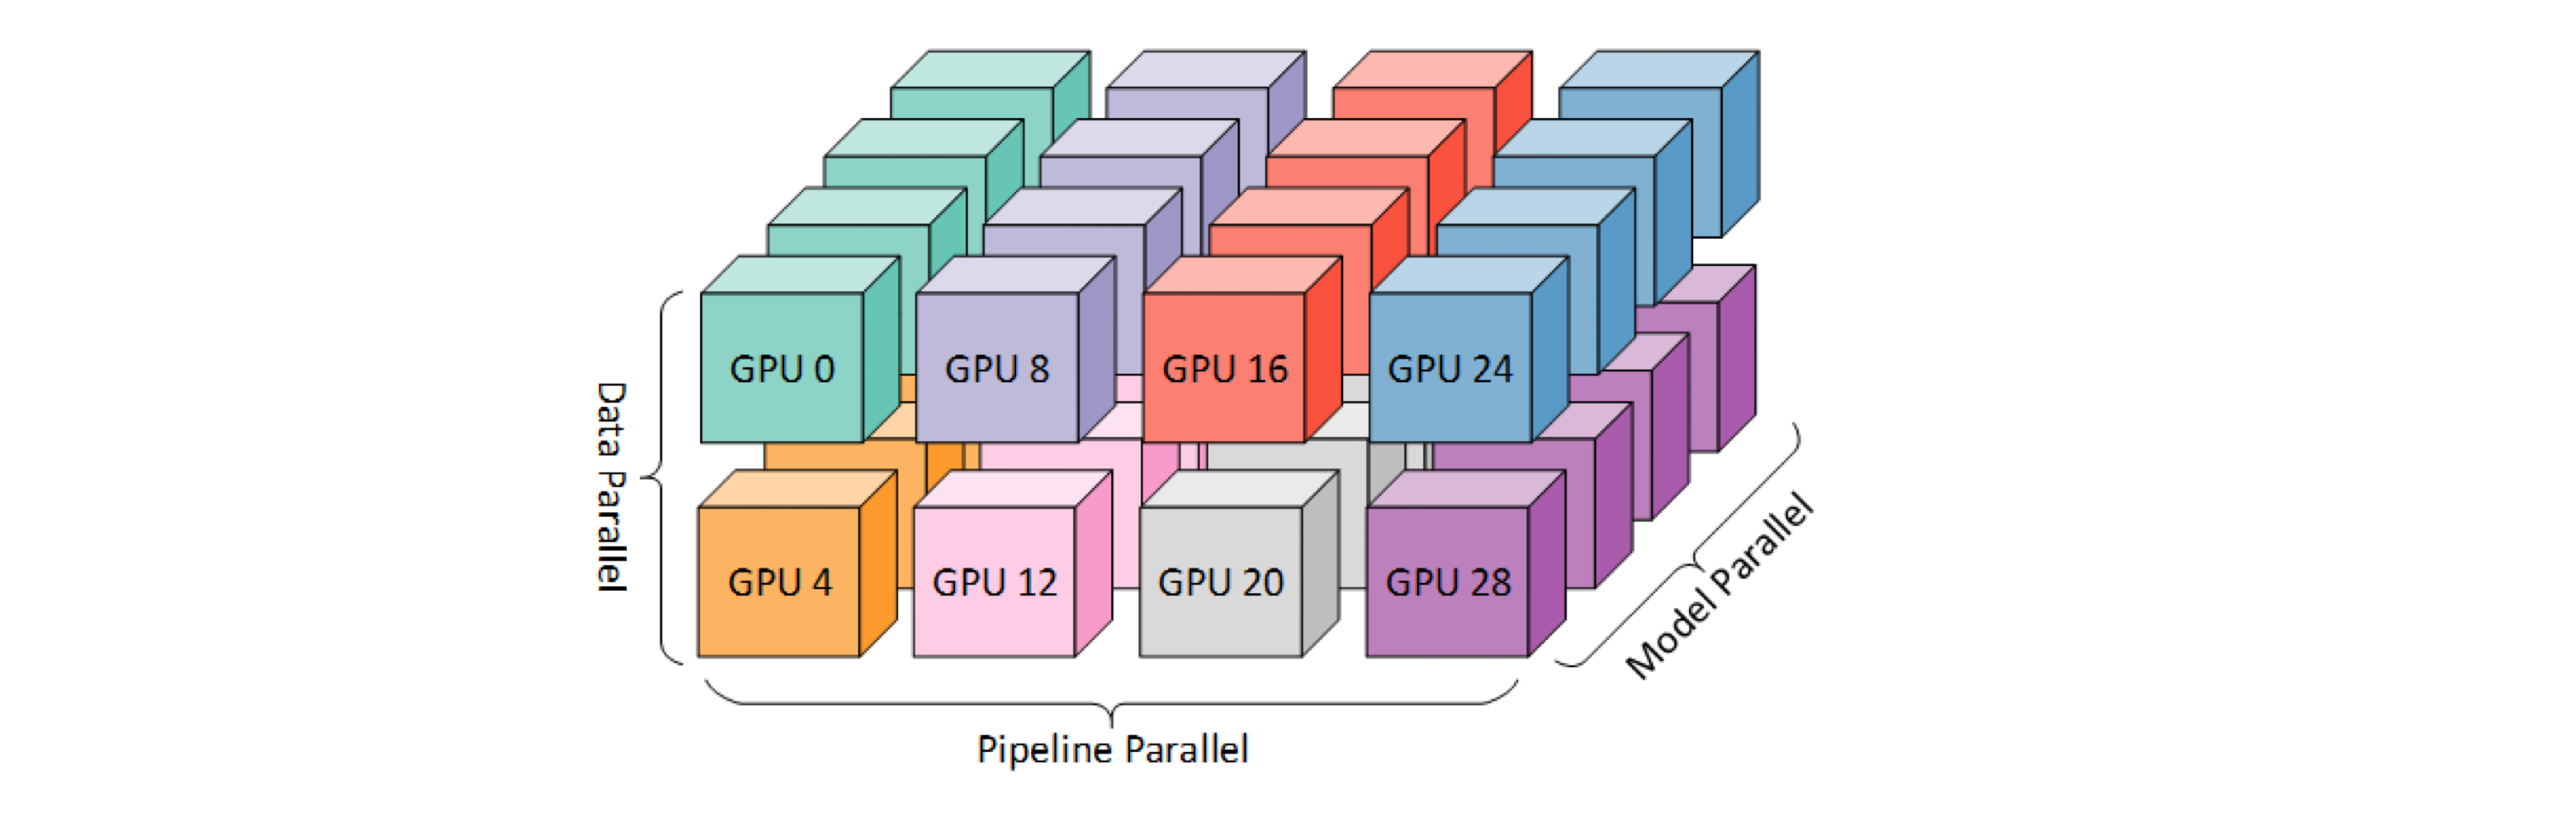
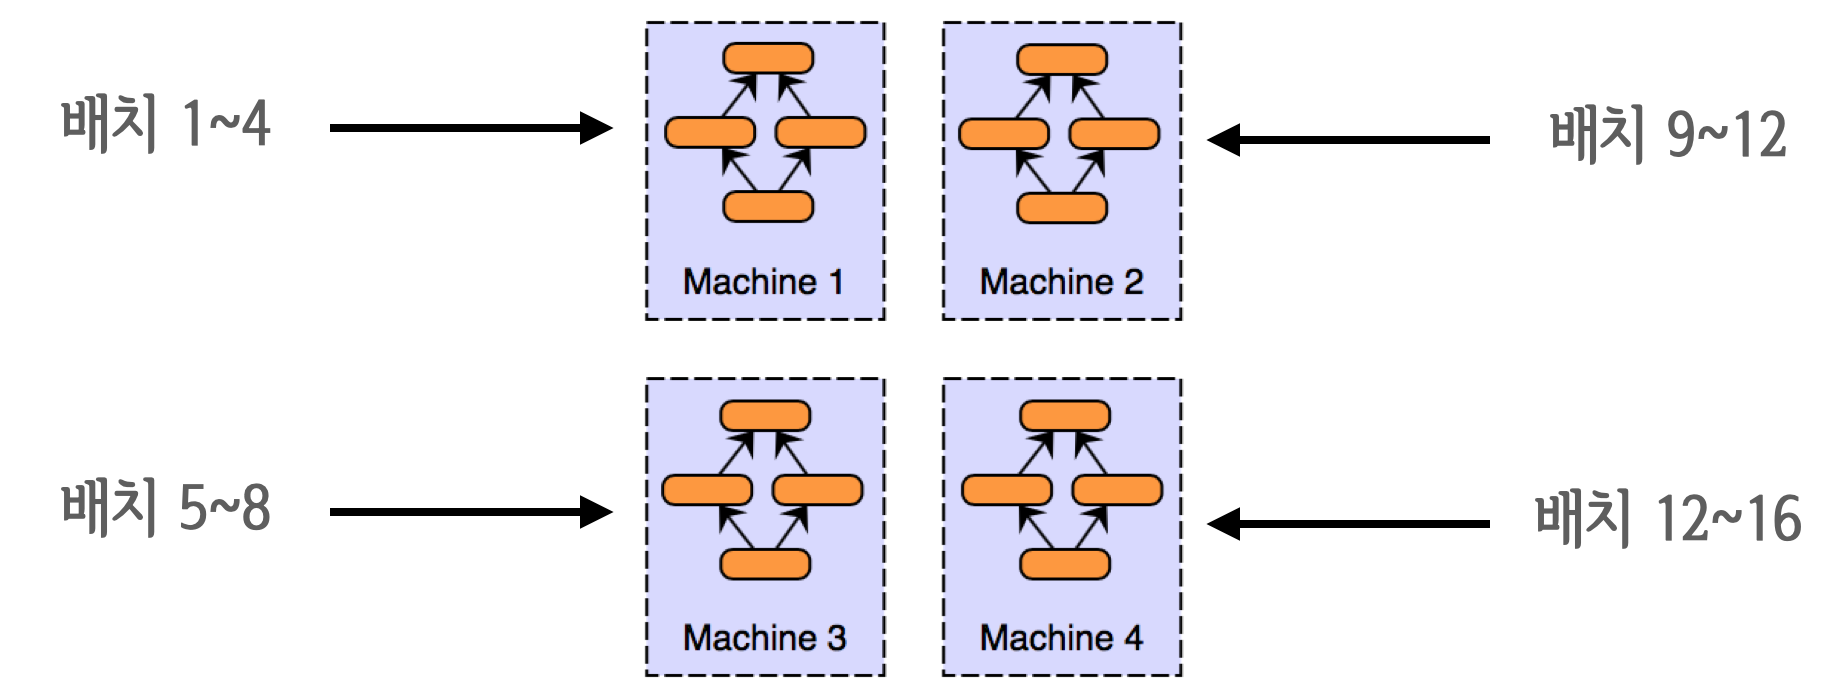
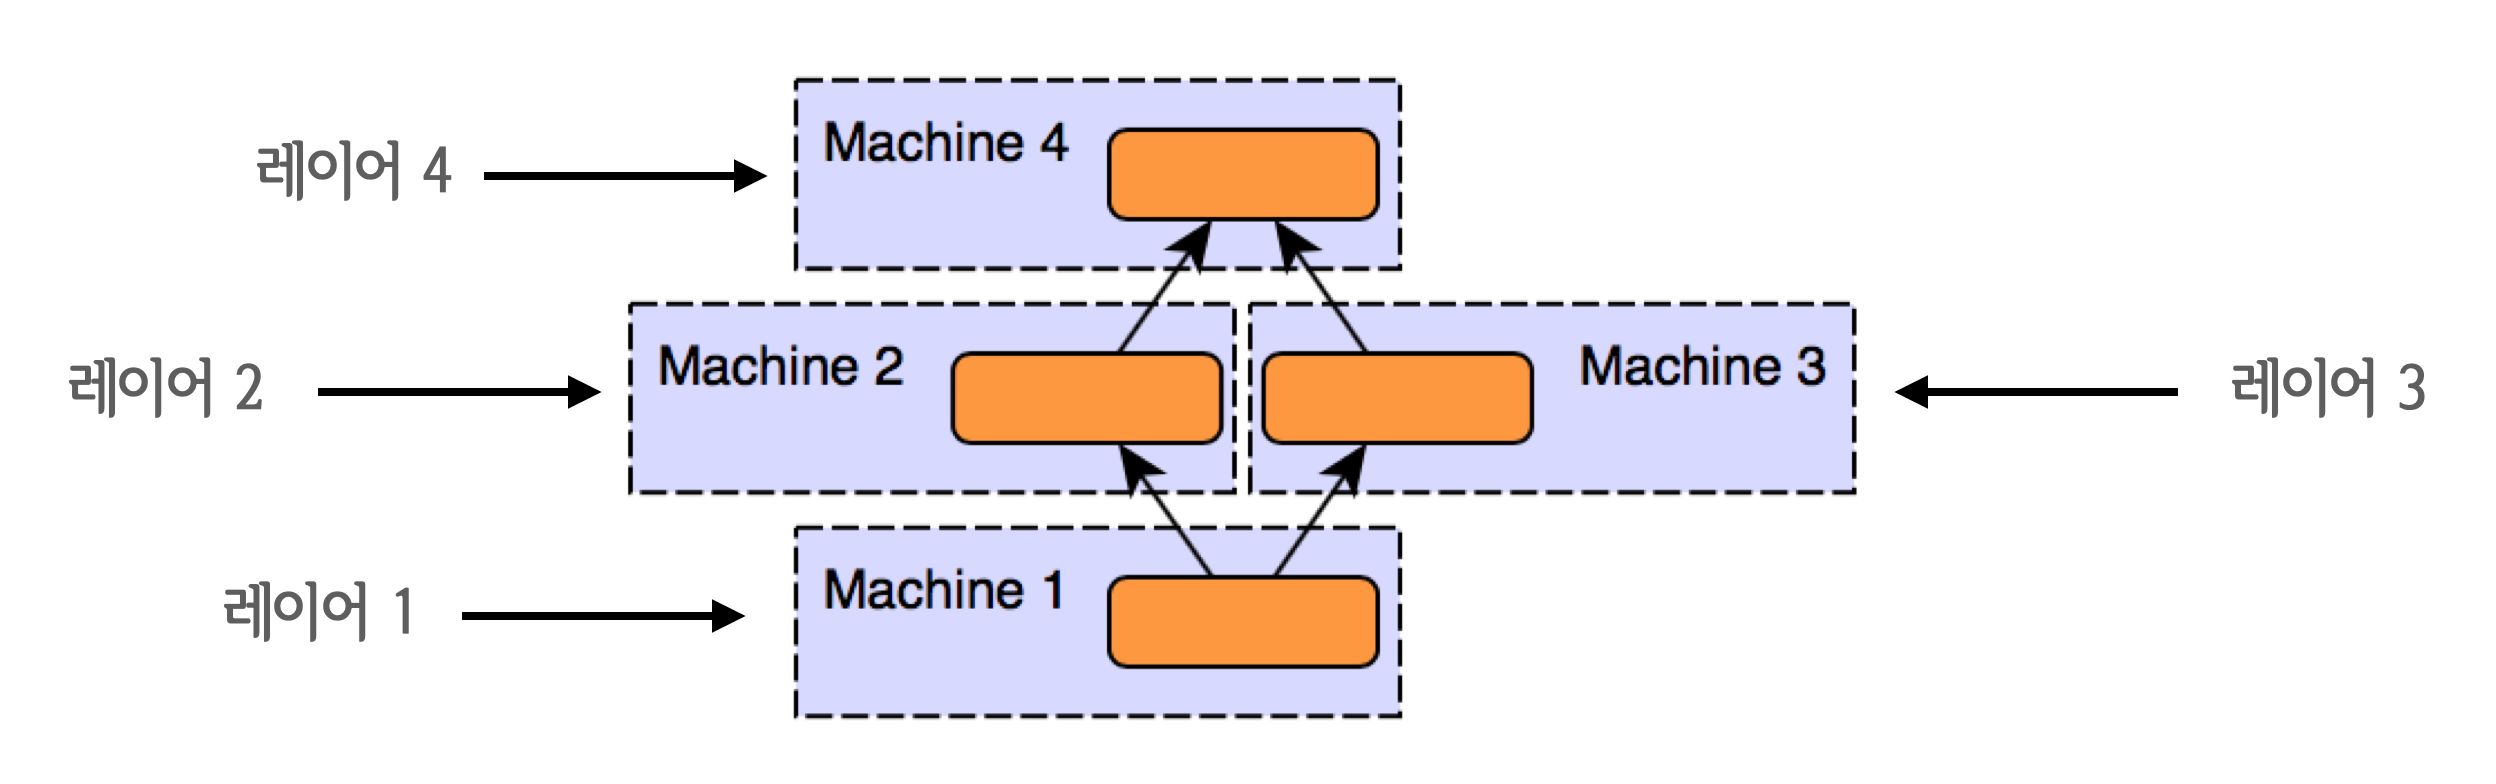